# Yumurta Satışlarının Analizi

Bu dosyada 6lı ve 10lu yumurta satışlarının analizini gerçekleştireceğiz.

Veri kümesini okuyarak başlayalım.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df= pd.read_csv('Yumurta_Sales2.csv')
df.columns = ['Tarih', 'Magaza', 'UrunNo', 'Tur', 'Tutar']
df.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6.0,3.1
1,29.03.2015,1992,20000301,10.0,26.1
2,12.05.2015,2126,20000290,6.0,59.8
3,03.04.2015,4193,20000080,10.0,35.5
4,13.02.2015,1095,20000020,6.0,4.8


Ürün türleri ondalıklı olarak verilmiş. Bunları tamsayıya çevirelim.

In [3]:
df['Tur'] = df['Tur'].astype(int)

In [4]:
df.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6,3.1
1,29.03.2015,1992,20000301,10,26.1
2,12.05.2015,2126,20000290,6,59.8
3,03.04.2015,4193,20000080,10,35.5
4,13.02.2015,1095,20000020,6,4.8


Veride gün ve mağaza bazında 6lı ve 10lu yumurtaların ürün başına satış miktarları var. Sadece 6lı ürünleri içeren bir veri çerçevesi oluşturalım.

In [5]:
df_6 = df[df['Tur'] == 6]

In [6]:
df_6.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6,3.1
2,12.05.2015,2126,20000290,6,59.8
4,13.02.2015,1095,20000020,6,4.8
9,26.09.2015,4327,20000021,6,32.5
12,06.11.2015,285,20001932,6,15.7


Tarih, ürün ve mağaza bazında en çok satan ürünleri bulalım.

In [7]:
df_6.sort_values(by = ['Tutar'], ascending = False).head(10)

,Tarih,Magaza,UrunNo,Tur,Tutar
398539,01.10.2015,279,20000021,6,542.2
1602301,09.01.2015,1096,20000020,6,486.0
1425050,25.10.2015,1096,20000021,6,444.2
73600,12.12.2015,480,20000021,6,444.0
382705,04.01.2015,1096,20000020,6,426.1
925185,08.12.2015,279,20000021,6,424.1
1566166,11.10.2015,1096,20000021,6,421.8
620591,12.09.2015,1096,20000021,6,421.7
1129877,06.12.2015,1096,20000021,6,420.7
1534717,24.10.2015,1096,20000021,6,419.2


Ürün numarası ve mağazalarla ilgilenmeden gün bazında 6lı yumurta satışlarını toplayalım.

df_6 = df_6.groupby(by=['Tarih']).agg({'Tutar':'sum'}).reset_index()
print(df_6)

# Index

Pandas indexleri veri çerçevelerinin en önemli temel taşlarından biridir. Veri çerçevelerindeki işlemler index üzerinden daha kolay bir şekilde yürütülebilir. Bu örnekte index olarak tarih değerlerini kullanacağız. Tarih kolonunu tarih veri tipine çeirerek index değerine atayacağız.


In [9]:
df_6.index = pd.to_datetime(df_6['Tarih'])
df_6.tail()

,Tarih,Tutar
Tarih,,
2015-05-31,31.05.2015,76632.4
2015-07-31,31.07.2015,87505.0
2015-08-31,31.08.2015,94573.3
2015-10-31,31.10.2015,94262.6
2015-12-31,31.12.2015,89856.4


Tarih kolonunu silelim.

In [10]:
df_6.drop('Tarih', axis = 1, inplace = True)
df_6.head()

,Tutar
Tarih,
2015-01-01,63912.4
2015-01-02,77735.8
2015-01-03,81133.3
2015-01-04,68464.0
2015-01-05,82147.4


Tarihe göre sıralayalım.

In [11]:
df_6 = df_6.sort_index()
print(df_6.head())
print(df_6.tail())

              Tutar
Tarih              
2015-01-01  63912.4
2015-01-02  77735.8
2015-01-03  81133.3
2015-01-04  68464.0
2015-01-05  82147.4
              Tutar
Tarih              
2015-12-27  80484.2
2015-12-28  78014.9
2015-12-29  74967.6
2015-12-30  86781.0
2015-12-31  89856.4


Şimdi satışın yıllık grafiğini çizelim

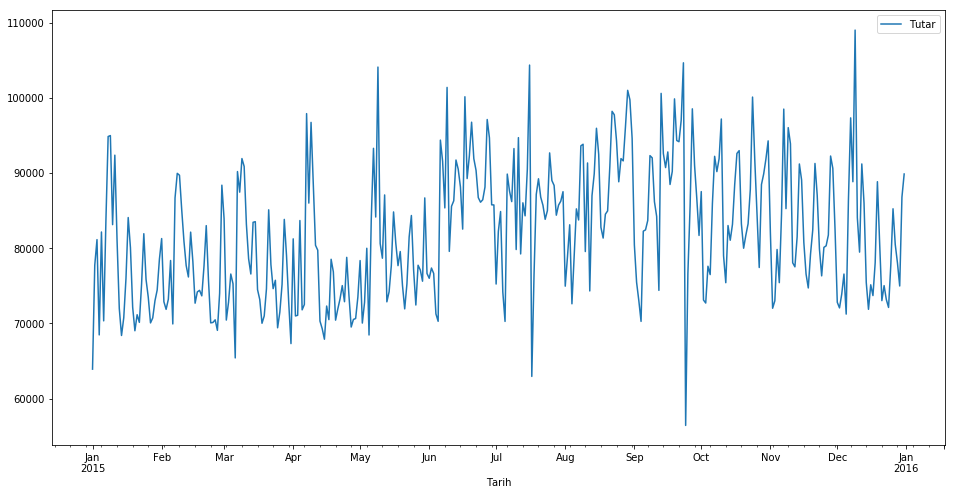

In [12]:
df_6.plot(figsize = (16,8))
plt.show()

Şimdi yumurta satışlarını yumurtanın paket büyüklüğüne göre günlük olarak derleyen bir fonksiyon oluşturalım. Fonksiyon bir veri çerçevesi ve yumurta paket büyüklüğünü alacak. Fonksiyona verinin ham halini sağlayacağız.

In [13]:
df.head()

,Tarih,Magaza,UrunNo,Tur,Tutar
0,05.05.2015,4561,20000021,6,3.1
1,29.03.2015,1992,20000301,10,26.1
2,12.05.2015,2126,20000290,6,59.8
3,03.04.2015,4193,20000080,10,35.5
4,13.02.2015,1095,20000020,6,4.8


In [14]:
def yumurta_gunluk(df, paket = 6):
    df_gunluk = df[df['Tur'] == paket]
    df_gunluk = df_gunluk.groupby('Tarih').agg({'Tutar':'sum'}).reset_index()
    df_gunluk.index = pd.to_datetime(df_gunluk['Tarih'])
    df_gunluk.drop('Tarih', axis = 1, inplace = True)
    #df_gunluk = df_gunluk.groupby(level = 0).agg({'Tutar': 'sum'})
    df_gunluk = df_gunluk.sort_index()
    df_gunluk.columns = ['Tutar_' + str(paket)]
    return df_gunluk


In [15]:
df_6_gunluk = yumurta_gunluk(df, 6)
df_10_gunluk = yumurta_gunluk(df, 10)

In [16]:
print(df_6_gunluk.head())
print(df_6_gunluk.tail())
print(df_10_gunluk.head())
print(df_10_gunluk.tail())

            Tutar_6
Tarih              
2015-01-01  63912.4
2015-01-02  77735.8
2015-01-03  81133.3
2015-01-04  68464.0
2015-01-05  82147.4
            Tutar_6
Tarih              
2015-12-27  80484.2
2015-12-28  78014.9
2015-12-29  74967.6
2015-12-30  86781.0
2015-12-31  89856.4
            Tutar_10
Tarih               
2015-01-01  137295.0
2015-01-02  182161.9
2015-01-03  216229.2
2015-01-04  152489.4
2015-01-05  172953.4
            Tutar_10
Tarih               
2015-12-27  218629.0
2015-12-28  194661.0
2015-12-29  200623.2
2015-12-30  229897.7
2015-12-31  215830.4


Şimdi bu iki veri çerçevesini birleştirerek üçüncü bir veri çerçevesi oluşturalım.

In [17]:
df_yumurta = pd.concat((df_6_gunluk, df_10_gunluk), axis=1)
print(df_yumurta.head())
print(df_yumurta.tail())

            Tutar_6  Tutar_10
Tarih                        
2015-01-01  63912.4  137295.0
2015-01-02  77735.8  182161.9
2015-01-03  81133.3  216229.2
2015-01-04  68464.0  152489.4
2015-01-05  82147.4  172953.4
            Tutar_6  Tutar_10
Tarih                        
2015-12-27  80484.2  218629.0
2015-12-28  78014.9  194661.0
2015-12-29  74967.6  200623.2
2015-12-30  86781.0  229897.7
2015-12-31  89856.4  215830.4


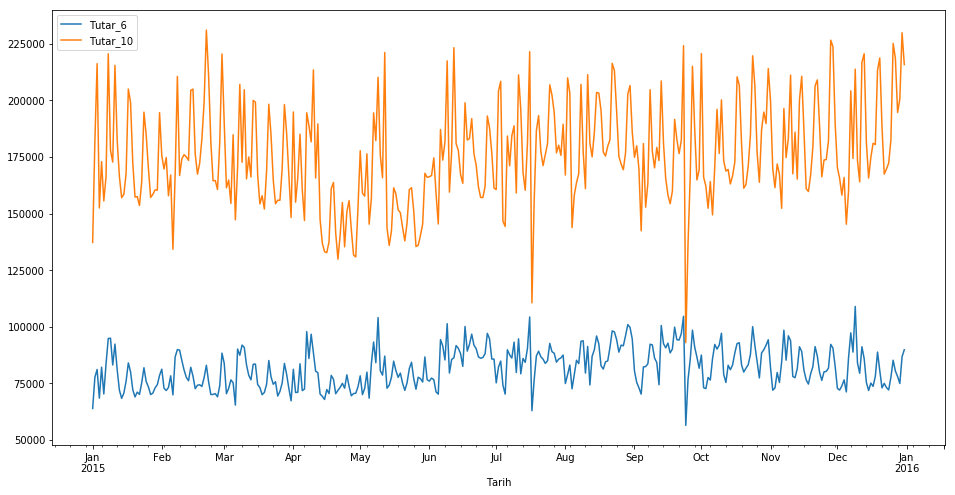

In [18]:
df_yumurta.plot(figsize = (16,8))
plt.show()

İndexin zaman olması, aylık ya da haftalık olarak verileri toplulaştırmamıza imkan tanır.

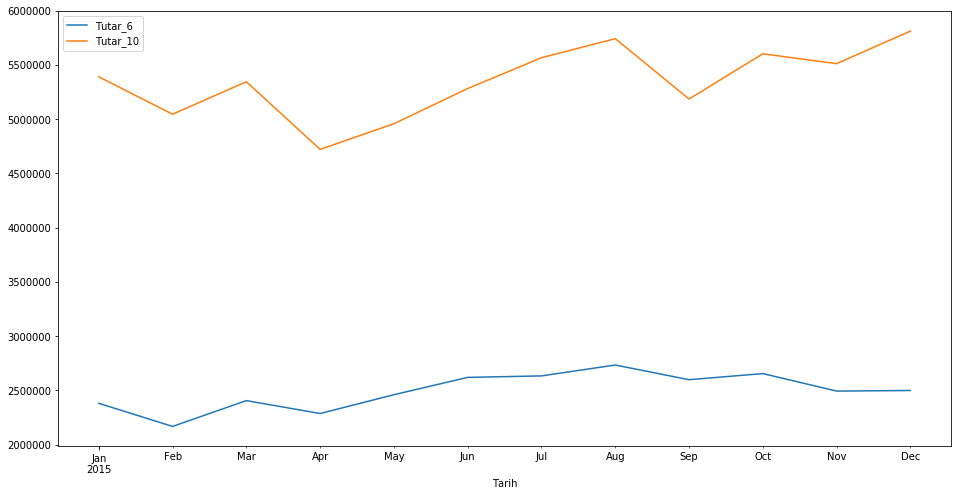

In [19]:
df_monthly = df_yumurta.resample('M').sum()
df_monthly.plot(figsize=(16,8))
plt.show()

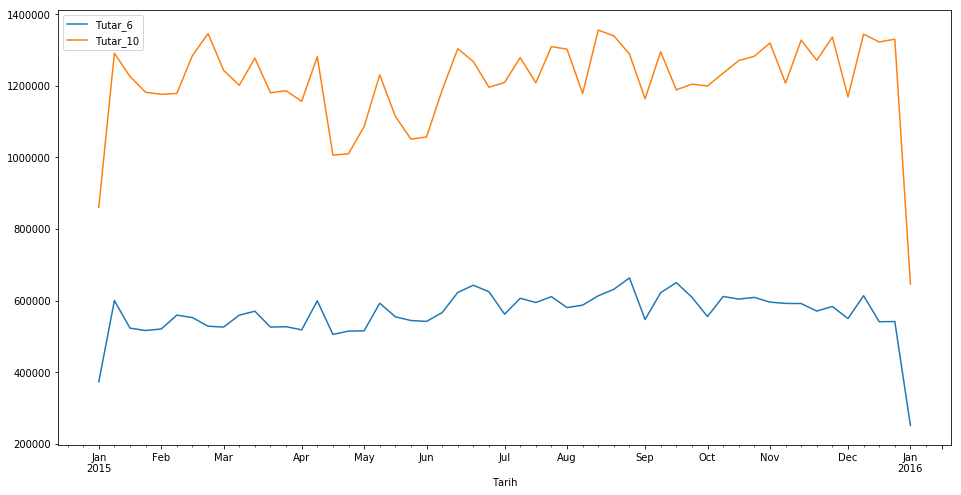

In [20]:
df_weekly = df_yumurta.resample('W-MON').sum()
df_weekly.plot(figsize=(16,8))
plt.show()

# Pivoting
Tarih ve tür bazında satışları her gün için toplayalım.

In [24]:
df= pd.read_csv('Yumurta_Sales.csv')
df.columns = ['Tarih', 'Magaza', 'UrunNo', 'Tur', 'Tutar']
df.head()

df_grouped = df.groupby(['Tarih', 'Tur']).agg({'Tutar':'sum'}).reset_index()

Pivot_table fonksiyonu ile tabloyu pivotlayalım. Index değeri tarih olacak, Tür kolonundaki değerler yeni kolonlarımızı oluşturacak, Tutar değeri ise veri çerçevesindeki değerleri içerecek.

In [23]:
df_pivot = pd.pivot_table(df_grouped, index='Tarih', columns='Tur', values='Tutar')
print(df_pivot)

Tur             6.0       10.0
Tarih                         
01.01.2015   63912.4  137295.0
01.02.2015   77735.8  182161.9
01.03.2015   81133.3  216229.2
01.04.2015   68464.0  152489.4
01.05.2015   82147.4  172953.4
01.06.2015   70331.9  155612.8
01.07.2015   83640.0  166320.8
01.08.2015   94841.3  220624.6
01.09.2015   94966.5  178012.3
01.10.2015   83123.8  172759.8
01.11.2015   92361.1  215500.3
01.12.2015   81022.0  182272.4
02.01.2015   81275.0  175637.0
02.02.2015   72876.4  169706.1
02.03.2015   71862.0  174773.9
02.04.2015   73205.1  157882.5
02.05.2015   78355.3  167077.7
02.06.2015   69920.3  134261.6
02.07.2015   86677.3  167414.2
02.08.2015   89942.4  210601.5
02.09.2015   89689.8  166844.4
02.10.2015   85089.6  174210.1
02.11.2015   80923.4  176041.9
02.12.2015   77682.5  175063.0
03.01.2015   83904.2  190199.8
03.02.2015   70436.8  161416.1
03.03.2015   72826.8  164826.5
03.04.2015   76557.8  154472.7
03.05.2015   75265.0  184828.2
03.06.2015   65404.3  147283.5
...     

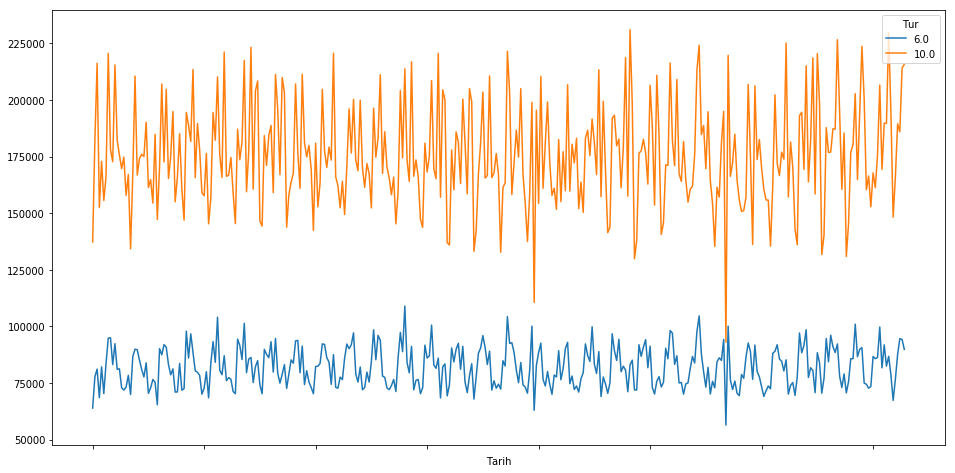

In [26]:
df_pivot.plot(figsize = (16,8))
plt.show()